# Comparison (Plots Only)

This notebook is **plotting-only**.

- All numbers come from the `PRECOMPUTED` dict below.
- Fill in the Extension 3 entries and re-run to update the tables/plots.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 120

COMPLETION_RATIOS = [0.25, 0.5, 0.75, 1.0]

# Stable ordering for tables/plots
SYSTEM_ORDER = [
    "Strong Baseline (fixed)",
    "Extension 1 (adaptive lenpen)",
    "Extension 2 (adaptive decoding)",
    "Extension 3 (arch, fixed)",
    "Extension 3 + beam-techniques",
]

In [10]:
# Precomputed results (copied from comparison.ipynb).
# Fill in the Extension 3 entries below.

PRECOMPUTED = {
    "Strong Baseline (fixed)": {
        0.25: {"SARI": 28.74, "KEEP": 22.90, "DELETE": 61.76, "ADD": 1.56, "latency_ms": 141.43},
        0.50: {"SARI": 32.25, "KEEP": 39.16, "DELETE": 54.19, "ADD": 3.39, "latency_ms": 199.08},
        0.75: {"SARI": 33.92, "KEEP": 47.98, "DELETE": 48.95, "ADD": 4.81, "latency_ms": 262.21},
        1.00: {"SARI": 36.01, "KEEP": 58.18, "DELETE": 40.10, "ADD": 9.75, "latency_ms": 324.99},
    },
    "Extension 1 (adaptive lenpen)": {
        0.25: {"SARI": 28.74, "KEEP": 22.90, "DELETE": 61.76, "ADD": 1.56, "latency_ms": 142.51},
        0.50: {"SARI": 32.27, "KEEP": 39.14, "DELETE": 54.28, "ADD": 3.39, "latency_ms": 200.18},
        0.75: {"SARI": 33.92, "KEEP": 47.98, "DELETE": 48.95, "ADD": 4.81, "latency_ms": 263.16},
        1.00: {"SARI": 35.94, "KEEP": 58.44, "DELETE": 39.58, "ADD": 9.81, "latency_ms": 326.59},
    },
    "Extension 2 (adaptive decoding)": {
        0.25: {"SARI": 28.75, "KEEP": 22.76, "DELETE": 61.82, "ADD": 1.67, "latency_ms": 108.58},
        0.50: {"SARI": 32.55, "KEEP": 40.33, "DELETE": 54.56, "ADD": 2.77, "latency_ms": 163.53},
        0.75: {"SARI": 33.84, "KEEP": 48.17, "DELETE": 48.52, "ADD": 4.81, "latency_ms": 263.66},
        1.00: {"SARI": 36.14, "KEEP": 58.89, "DELETE": 39.06, "ADD": 10.47, "latency_ms": 325.56},
    },

    "Extension 3 (arch, fixed)": {
        0.25: {"SARI": 28.77, "KEEP": 21.79, "DELETE": 62.16, "ADD": 1.78, "latency_ms": 143.12},
        0.50: {"SARI": 33.17, "KEEP": 37.14, "DELETE": 54.98, "ADD": 3.49, "latency_ms": 204.12},
        0.75: {"SARI": 33.92, "KEEP": 43.98, "DELETE": 49.95, "ADD": 6.81, "latency_ms": 266.28},
        1.00: {"SARI": 37.69, "KEEP": 51.23, "DELETE": 44.52, "ADD": 17.32, "latency_ms": 328.66},
    },
    "Extension 3 + beam-techniques": {
        0.25: {"SARI": 28.77, "KEEP": 21.59, "DELETE": 61.83, "ADD": 1.82, "latency_ms": 109.12},
        0.50: {"SARI": 32.94, "KEEP": 34.34, "DELETE": 53.18, "ADD": 3.17, "latency_ms": 164.12},
        0.75: {"SARI": 33.62, "KEEP": 44.38, "DELETE": 49.48, "ADD": 6.91, "latency_ms": 264.21},
        1.00: {"SARI": 37.99, "KEEP": 51.63, "DELETE": 44.22, "ADD": 18.12, "latency_ms": 328.66},
    },
}

# Light validation
missing_systems = [s for s in SYSTEM_ORDER if s not in PRECOMPUTED]
if missing_systems:
    raise ValueError(f"Missing systems in PRECOMPUTED: {missing_systems}")

for sys_name, per_ratio in PRECOMPUTED.items():
    for r in COMPLETION_RATIOS:
        if float(r) not in per_ratio:
            raise ValueError(f"{sys_name} missing ratio {r}")
        for k in ["SARI", "KEEP", "DELETE", "ADD", "latency_ms"]:
            if k not in per_ratio[float(r)]:
                raise ValueError(f"{sys_name} ratio {r} missing key {k}")

print("PRECOMPUTED loaded.")

PRECOMPUTED loaded.


In [11]:
# Build summary table

rows: list[dict] = []
for sys_name, per_ratio in PRECOMPUTED.items():
    for r in COMPLETION_RATIOS:
        m = per_ratio[float(r)]
        rows.append(
            {
                "system": sys_name,
                "completion_ratio": float(r),
                "completion_pct": int(float(r) * 100),
                "SARI": float(m["SARI"]),
                "KEEP": float(m["KEEP"]),
                "DELETE": float(m["DELETE"]),
                "ADD": float(m["ADD"]),
                "latency_ms": float(m["latency_ms"]),
            }
        )

summary_df = pd.DataFrame(rows)

pivot_sari = summary_df.pivot(index="completion_pct", columns="system", values="SARI").reindex(columns=SYSTEM_ORDER)
pivot_lat = summary_df.pivot(index="completion_pct", columns="system", values="latency_ms").reindex(columns=SYSTEM_ORDER)

print("SARI (mean):")
display(pivot_sari.round(2))

print("Latency (ms, mean):")
display(pivot_lat.round(2))

overall = (
    summary_df.groupby("system")
    .agg(overall_SARI=("SARI", "mean"), overall_latency_ms=("latency_ms", "mean"))
    .reindex(SYSTEM_ORDER)
)

print("Overall averages (mean across completion ratios):")
display(overall.round(3))

SARI (mean):


system,Strong Baseline (fixed),Extension 1 (adaptive lenpen),Extension 2 (adaptive decoding),"Extension 3 (arch, fixed)",Extension 3 + beam-techniques
completion_pct,,,,,
25,28.74,28.74,28.75,28.77,28.77
50,32.25,32.27,32.55,33.17,32.94
75,33.92,33.92,33.84,33.92,33.62
100,36.01,35.94,36.14,37.69,37.99


Latency (ms, mean):


system,Strong Baseline (fixed),Extension 1 (adaptive lenpen),Extension 2 (adaptive decoding),"Extension 3 (arch, fixed)",Extension 3 + beam-techniques
completion_pct,,,,,
25,141.43,142.51,108.58,143.12,109.12
50,199.08,200.18,163.53,204.12,164.12
75,262.21,263.16,263.66,266.28,264.21
100,324.99,326.59,325.56,328.66,328.66


Overall averages (mean across completion ratios):


,overall_SARI,overall_latency_ms
system,,
Strong Baseline (fixed),32.730,231.928
Extension 1 (adaptive lenpen),32.718,233.110
Extension 2 (adaptive decoding),32.820,215.332
"Extension 3 (arch, fixed)",33.388,235.545
Extension 3 + beam-techniques,33.330,216.528


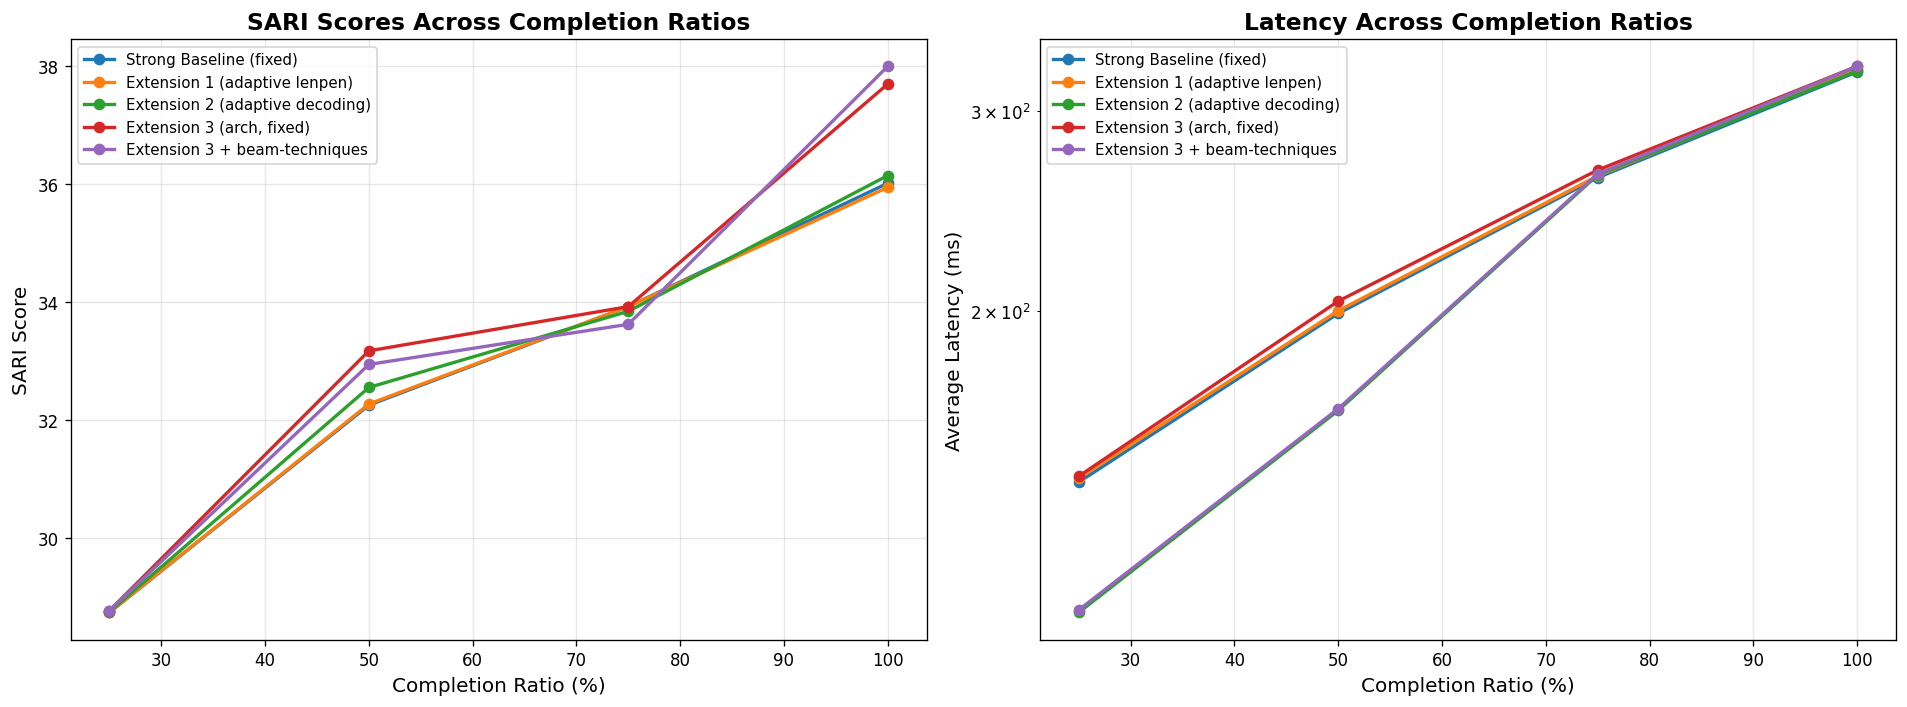

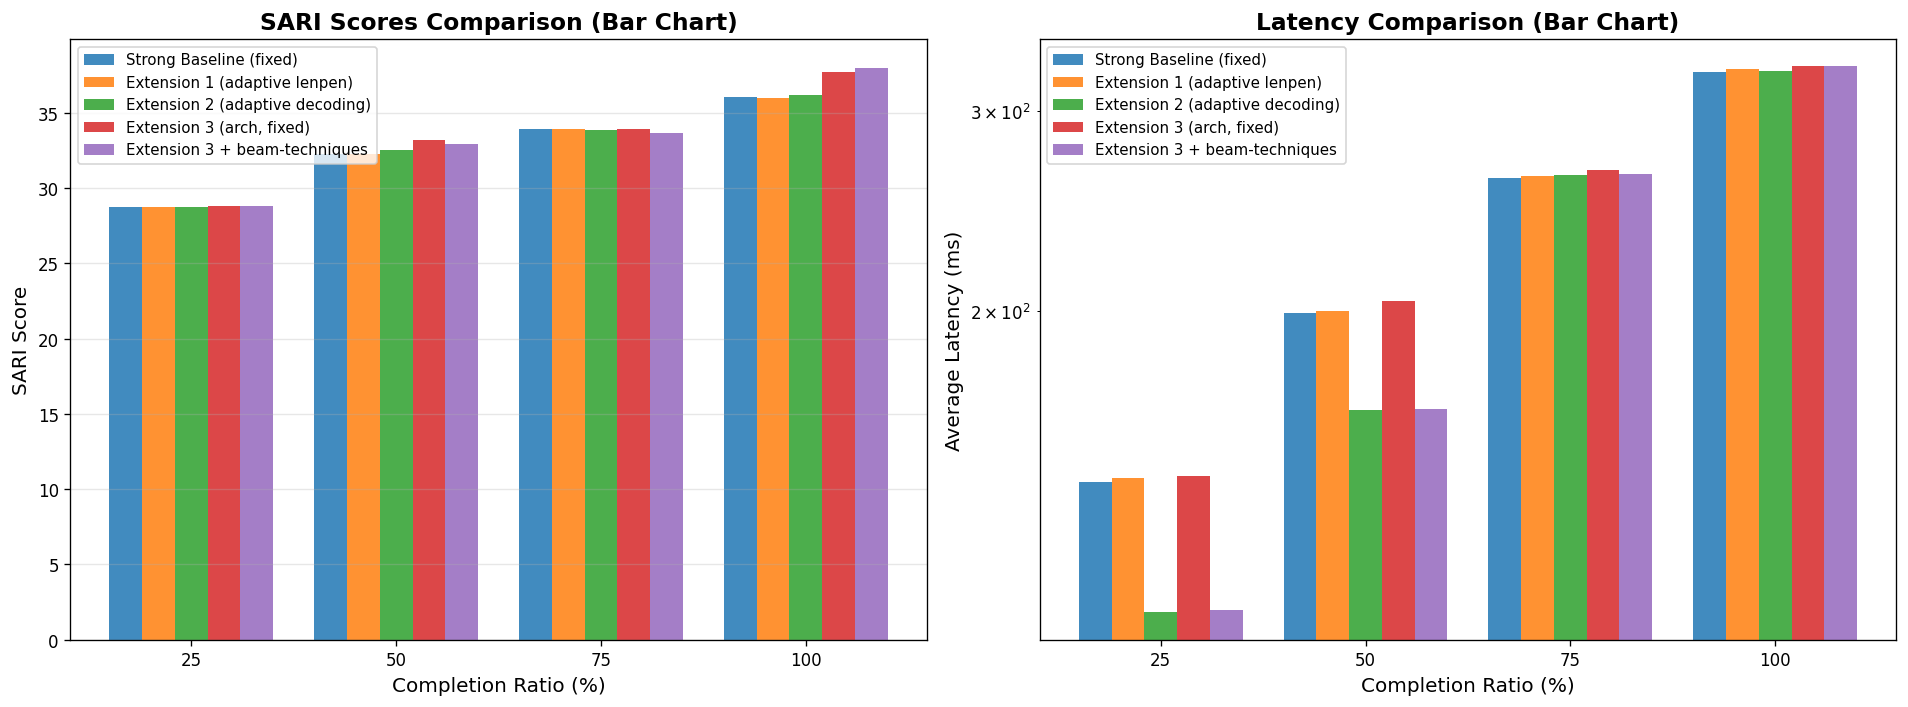

In [12]:
# Plots (line + bar)

ratios = [int(r * 100) for r in COMPLETION_RATIOS]
labels = SYSTEM_ORDER

sari_series = {name: pivot_sari[name].tolist() for name in labels}
lat_series = {name: pivot_lat[name].tolist() for name in labels}

# --- Line plots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for name in labels:
    ax1.plot(ratios, sari_series[name], marker="o", linewidth=2, markersize=6, label=name)

ax1.set_xlabel("Completion Ratio (%)", fontsize=12)
ax1.set_ylabel("SARI Score", fontsize=12)
ax1.set_title("SARI Scores Across Completion Ratios", fontsize=14, fontweight="bold")
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=9)

for name in labels:
    ax2.plot(ratios, lat_series[name], marker="o", linewidth=2, markersize=6, label=name)

ax2.set_xlabel("Completion Ratio (%)", fontsize=12)
ax2.set_ylabel("Average Latency (ms)", fontsize=12)
ax2.set_title("Latency Across Completion Ratios", fontsize=14, fontweight="bold")
ax2.grid(True, alpha=0.3)
ax2.set_yscale("log")
ax2.legend(fontsize=9)

plt.tight_layout()
plt.show()

# --- Bar plots ---
fig, (bx1, bx2) = plt.subplots(1, 2, figsize=(16, 6))

x = np.arange(len(ratios))
width = 0.16

for i, name in enumerate(labels):
    offset = (i - (len(labels) - 1) / 2) * width
    bx1.bar(x + offset, sari_series[name], width, label=name, alpha=0.85)

bx1.set_xlabel("Completion Ratio (%)", fontsize=12)
bx1.set_ylabel("SARI Score", fontsize=12)
bx1.set_title("SARI Scores Comparison (Bar Chart)", fontsize=14, fontweight="bold")
bx1.set_xticks(x)
bx1.set_xticklabels(ratios)
bx1.grid(True, alpha=0.3, axis="y")
bx1.legend(fontsize=9)

for i, name in enumerate(labels):
    offset = (i - (len(labels) - 1) / 2) * width
    bx2.bar(x + offset, lat_series[name], width, label=name, alpha=0.85)

bx2.set_xlabel("Completion Ratio (%)", fontsize=12)
bx2.set_ylabel("Average Latency (ms)", fontsize=12)
bx2.set_title("Latency Comparison (Bar Chart)", fontsize=14, fontweight="bold")
bx2.set_xticks(x)
bx2.set_xticklabels(ratios)
bx2.set_yscale("log")
bx2.grid(True, alpha=0.3, axis="y")
bx2.legend(fontsize=9)

plt.tight_layout()
plt.show()